# ProMis - Probabilistic Mission Design

The following shows how to import and setup ProMis to generate Probabilistic Mission Landscapes for a toy-problem.

Generated Probabilistic Mission Landscape.
>> Building the program took 0.20302104949951172s.
>> Compilation took 0.6978704929351807s.
>> Inference took 37.981040716171265s.


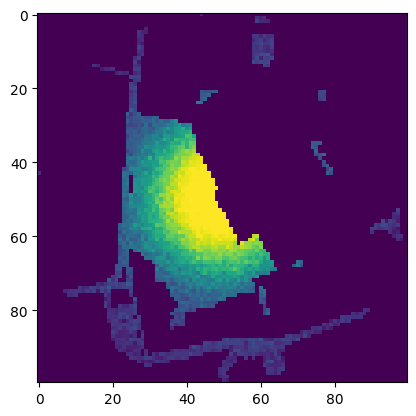

In [1]:
import matplotlib.pyplot as plt
from promis import ProMis
from promis.geo import LocationType, PolarLocation, CartesianLocation

# ProMis Parameters
dimensions = (1000.0, 1000.0)  # Meters
resolution = (100, 100)        # Pixels
spatial_samples = 50           # How many maps to generate to compute statistics
model = "Park"                 # Hybrid ProbLog to be used
cache = "../output"            # Where to cache computed data
types = [                      # Which types to load and compute relations for
    LocationType.PARK,
    LocationType.PRIMARY,
    LocationType.SECONDARY,
    LocationType.TERTIARY,
]  
tu_darmstadt = PolarLocation(latitude=49.878091, longitude=8.654052)

# Setup engine
pmd = ProMis(tu_darmstadt, dimensions, resolution, types, spatial_samples, cache)

# Set parameters that are unrelated to the loaded map data
# Here, we imagine the operator to be situated at the center of the mission area
pmd.create_from_location(CartesianLocation(0.0, 0.0, location_type=LocationType.OPERATOR))

# Generate landscape
with open(f"../models/{model}.pl", "r") as model_file:
    landscape, program_time, compile_time, inference_time = pmd.generate(logic=model_file.read(), n_jobs=8)

# Show result
print(f"Generated Probabilistic Mission Landscape.")
print(f">> Building the program took {program_time}s.")
print(f">> Compilation took {compile_time}s.")
print(f">> Inference took {inference_time}s.")
plt.imshow(landscape.data.T)